In [1]:
import pandas as pd
import math
import numpy as np
df=pd.read_excel('p1_data.xlsx')#这个会直接默认读取到这个Excel的第一个表单


In [2]:
green = df["CFActual (bar chart)"].values
black = df["CFConfig (Black line)"].values
print(len(green))
print(len(black))
print(green)
print(green)
'''
            i_n = i + 1
            i_p = i - 1
            while i_n < line_cnt:
                if not math.isnan(line[i_n]):
                    break
                i_n = i_n + 1
                
                
            while i_p > 0:
                if not math.isnan(line[i_p]):
                        break
                i_p = i_p - 1
'''

55448
55448
[  nan 1.545 2.391 ... 1.211 1.246   nan]
[  nan 1.545 2.391 ... 1.211 1.246   nan]


'\n            i_n = i + 1\n            i_p = i - 1\n            while i_n < line_cnt:\n                if not math.isnan(line[i_n]):\n                    break\n                i_n = i_n + 1\n                \n                \n            while i_p > 0:\n                if not math.isnan(line[i_p]):\n                        break\n                i_p = i_p - 1\n'

In [3]:
def imputation(line):
    line_cnt = len(line)
    query = []
    x_set = []
    y_set = []
    for i in range(line_cnt):
        if math.isnan(line[i]):
            query.append(i)
        else:
            x_set.append(i)
            y_set.append(line[i])

    res = np.interp(query, x_set, y_set)
    j = 0
    for i in res:
        line[query[j]] = i
        j = j + 1

    return line

def detect_outliers2(df):
    outlier_indices = []

    # 1st quartile (25%)
    Q1 = np.percentile(df, 25)
    print(Q1)
    # 3rd quartile (75%)
    Q3 = np.percentile(df, 75)
    print(Q3)
    # Interquartile range (IQR)
    IQR = Q3 - Q1

    # outlier step
    outlier_step = 1.5 * IQR
    delete_list = []
    for i in range(len(df)):
        if (df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step):
            delete_list.append(i)
    df = np.delete(df, delete_list)
    return df


In [4]:
green = imputation(green)
green = detect_outliers2(green)



0.343702380952381
0.9550000000000001


In [5]:
print(len(green))
print(green)

52499
[1.545      1.545      1.67433333 ... 1.211      1.246      1.246     ]


In [6]:
import matplotlib.pyplot as plt

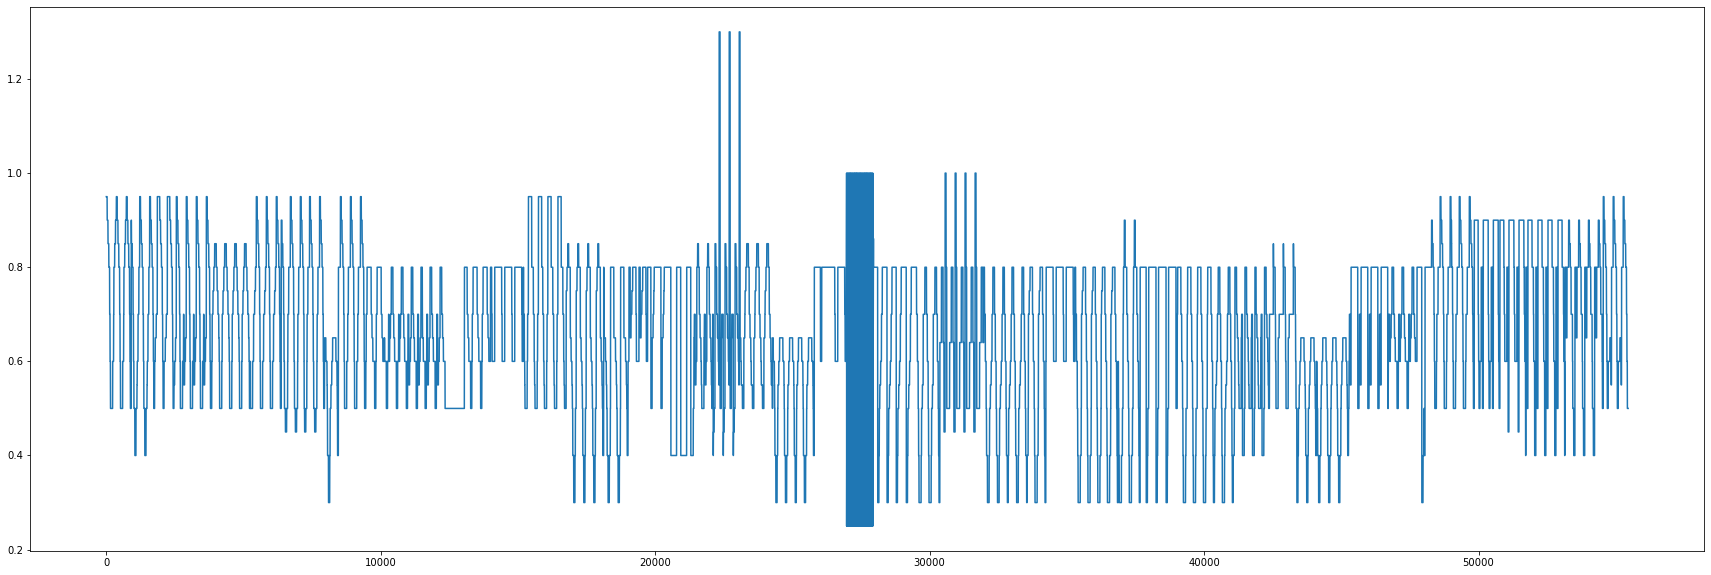

In [7]:
plt.figure(figsize=(30,10))
x = np.arange(len(black))
y = np.array(black)
plt.plot(x, y)
plt.show()

In [31]:
def cal_std(line, st, ed, ava):
    sum_ = 0
    for i in range(st, ed):
        sum_ += math.pow(line[i] - ava, 2)
    std = math.sqrt(float(sum_) / (ed - st))
    return std

def cal_pink_line(line):
    pink_line = np.arange(len(line), dtype=np.float64)
    line_len = len(line)
    st = 0
    ed = st + 7
    while ed < line_len:
        min_ = 10
        max_ = 0
        sum_ = 0
        for i in range(st, ed):
            sum_ = sum_ + line[i]
            if line[i] > max_:
                max_ = line[i]
            if line[i] < min_:
                min_ = line[i]   
        
        for i in range(ed, line_len):
            #if (line[i] < (ava + 0.2)) and (line[i] > (ava - 0.2)): # 区间在前七个数据均值上下0.2跳动
            ava = float(sum_) / (i - st)
            seg_std = cal_std(line, st, i, ava)
            #print(seg_std)
            if seg_std < 0.2:
                sum_ = sum_ + line[i]
                if line[i] > max_:
                    max_ = line[i]
                if line[i] < min_:
                    min_ = line[i]
                ed = i
            else:
                break
        
        pink = float(min_) + float(3/4)*(max_ - min_)
        range_ = np.arange(st, ed)
        ava = float(sum_) / (ed - st)
        #print(cal_std(line, st, ed, ava))
        print("segment ({},{}) lenth: {}, pink line values: {}, Standard Deviation: {}".format(st, ed, ed - st, pink, cal_std(line, st, ed, ava)))
        pink_line[range_] = pink
        st = ed
        ed = st + 7

    if ed != len(line):
        min_ = 10
        max_ = 0
        sum_ = 0
        for i in range(st, line_len):
            sum_ = sum_ + line[i]
            if line[i] > max_:
                max_ = line[i]
            if line[i] < min_:
                min_ = line[i]
        
        if ed != st:
            ava = float(sum_) / (line_len - st)
        else:
            ava = sum_
            
        pink = float(min_) + float(3/4)*(max_ - min_)
        range_ = np.arange(st, line_len)
        print(range_)
        pink_line[range_] = pink

    return pink_line
        
        
        

In [32]:
print(type(green))

<class 'numpy.ndarray'>


In [33]:
pink_line = cal_pink_line(green)

segment (0,7) lenth: 7, pink line values: 1.3159999999999998, Standard Deviation: 0.5038180528578621
segment (7,14) lenth: 7, pink line values: 0.9702500000000001, Standard Deviation: 0.3342820665246642
segment (14,21) lenth: 7, pink line values: 0.62225, Standard Deviation: 0.2712656653992352
segment (21,31) lenth: 10, pink line values: 0.94475, Standard Deviation: 0.17867455206479613
segment (31,38) lenth: 7, pink line values: 0.7657499999999999, Standard Deviation: 0.23927255827373342
segment (38,45) lenth: 7, pink line values: 0.8734999999999999, Standard Deviation: 0.27481467678412613
segment (45,52) lenth: 7, pink line values: 1.13025, Standard Deviation: 0.40555925944943
segment (52,59) lenth: 7, pink line values: 0.60325, Standard Deviation: 0.21531284784930882
segment (59,66) lenth: 7, pink line values: 1.0995, Standard Deviation: 0.39883595932285193
segment (66,73) lenth: 7, pink line values: 1.16925, Standard Deviation: 0.2794638270192493
segment (73,80) lenth: 7, pink line 

segment (10405,10941) lenth: 536, pink line values: 0.5785, Standard Deviation: 0.19999295802594103
segment (10941,11132) lenth: 191, pink line values: 0.84125, Standard Deviation: 0.19626936091124444
segment (11132,11139) lenth: 7, pink line values: 0.86, Standard Deviation: 0.33594361994996946
segment (11139,11171) lenth: 32, pink line values: 0.8000714285714285, Standard Deviation: 0.18913616717072418
segment (11171,11179) lenth: 8, pink line values: 0.8133999999999999, Standard Deviation: 0.18756742954201833
segment (11179,11194) lenth: 15, pink line values: 0.55985, Standard Deviation: 0.16868586188533996
segment (11194,11202) lenth: 8, pink line values: 0.8667499999999999, Standard Deviation: 0.14010413190829804
segment (11202,11292) lenth: 90, pink line values: 1.1125, Standard Deviation: 0.16576872899417938
segment (11292,11299) lenth: 7, pink line values: 1.1262500000000002, Standard Deviation: 0.4804807939630334
segment (11299,11306) lenth: 7, pink line values: 0.948874999999

segment (19183,20253) lenth: 1070, pink line values: 1.166125, Standard Deviation: 0.19971073966359038
segment (20253,20263) lenth: 10, pink line values: 0.7475, Standard Deviation: 0.19249622861865998
segment (20263,20270) lenth: 7, pink line values: 0.8147, Standard Deviation: 0.29605142892988806
segment (20270,20281) lenth: 11, pink line values: 1.2510833333333333, Standard Deviation: 0.17664320015971632
segment (20281,20288) lenth: 7, pink line values: 0.7801, Standard Deviation: 0.23336996243107078
segment (20288,20335) lenth: 47, pink line values: 1.2748666666666666, Standard Deviation: 0.20025393225575497
segment (20335,20358) lenth: 23, pink line values: 1.1045, Standard Deviation: 0.1564791704325149
segment (20358,20365) lenth: 7, pink line values: 1.1664999999999999, Standard Deviation: 0.2827697455969137
segment (20365,20372) lenth: 7, pink line values: 0.827, Standard Deviation: 0.27055652678076997
segment (20372,20385) lenth: 13, pink line values: 1.172, Standard Deviation

segment (39721,40070) lenth: 349, pink line values: 1.1869999999999998, Standard Deviation: 0.19767735212551724
segment (40070,40077) lenth: 7, pink line values: 1.2400000000000002, Standard Deviation: 0.2994064877352513
segment (40077,40319) lenth: 242, pink line values: 1.1437500000000003, Standard Deviation: 0.19528771306992945
segment (40319,40343) lenth: 24, pink line values: 1.22775, Standard Deviation: 0.1683105238431115
segment (40343,40350) lenth: 7, pink line values: 1.17225, Standard Deviation: 0.41054151645685466
segment (40350,40357) lenth: 7, pink line values: 1.535, Standard Deviation: 0.22120108129787008
segment (40357,40364) lenth: 7, pink line values: 1.66775, Standard Deviation: 0.22799841120105216
segment (40364,40371) lenth: 7, pink line values: 1.3645, Standard Deviation: 0.22522097991954115
segment (40371,40385) lenth: 14, pink line values: 1.1176249999999999, Standard Deviation: 0.1924135838367394
segment (40385,40392) lenth: 7, pink line values: 0.9259999999999

segment (51597,51919) lenth: 322, pink line values: 0.9942499999999999, Standard Deviation: 0.1990138061358634
segment (51919,51938) lenth: 19, pink line values: 0.89325, Standard Deviation: 0.14695079146028212
segment (51938,52056) lenth: 118, pink line values: 0.9204999999999999, Standard Deviation: 0.196804891132896
segment (52056,52063) lenth: 7, pink line values: 0.9764999999999999, Standard Deviation: 0.26144030895673354
segment (52063,52098) lenth: 35, pink line values: 0.80525, Standard Deviation: 0.19976275441104285
segment (52098,52105) lenth: 7, pink line values: 0.8882500000000001, Standard Deviation: 0.31310304752165374
segment (52105,52115) lenth: 10, pink line values: 0.810125, Standard Deviation: 0.22286231736208792
segment (52115,52122) lenth: 7, pink line values: 1.4320000000000002, Standard Deviation: 0.4225518323477111
segment (52122,52129) lenth: 7, pink line values: 1.3450000000000002, Standard Deviation: 0.36552014936503396
segment (52129,52136) lenth: 7, pink li

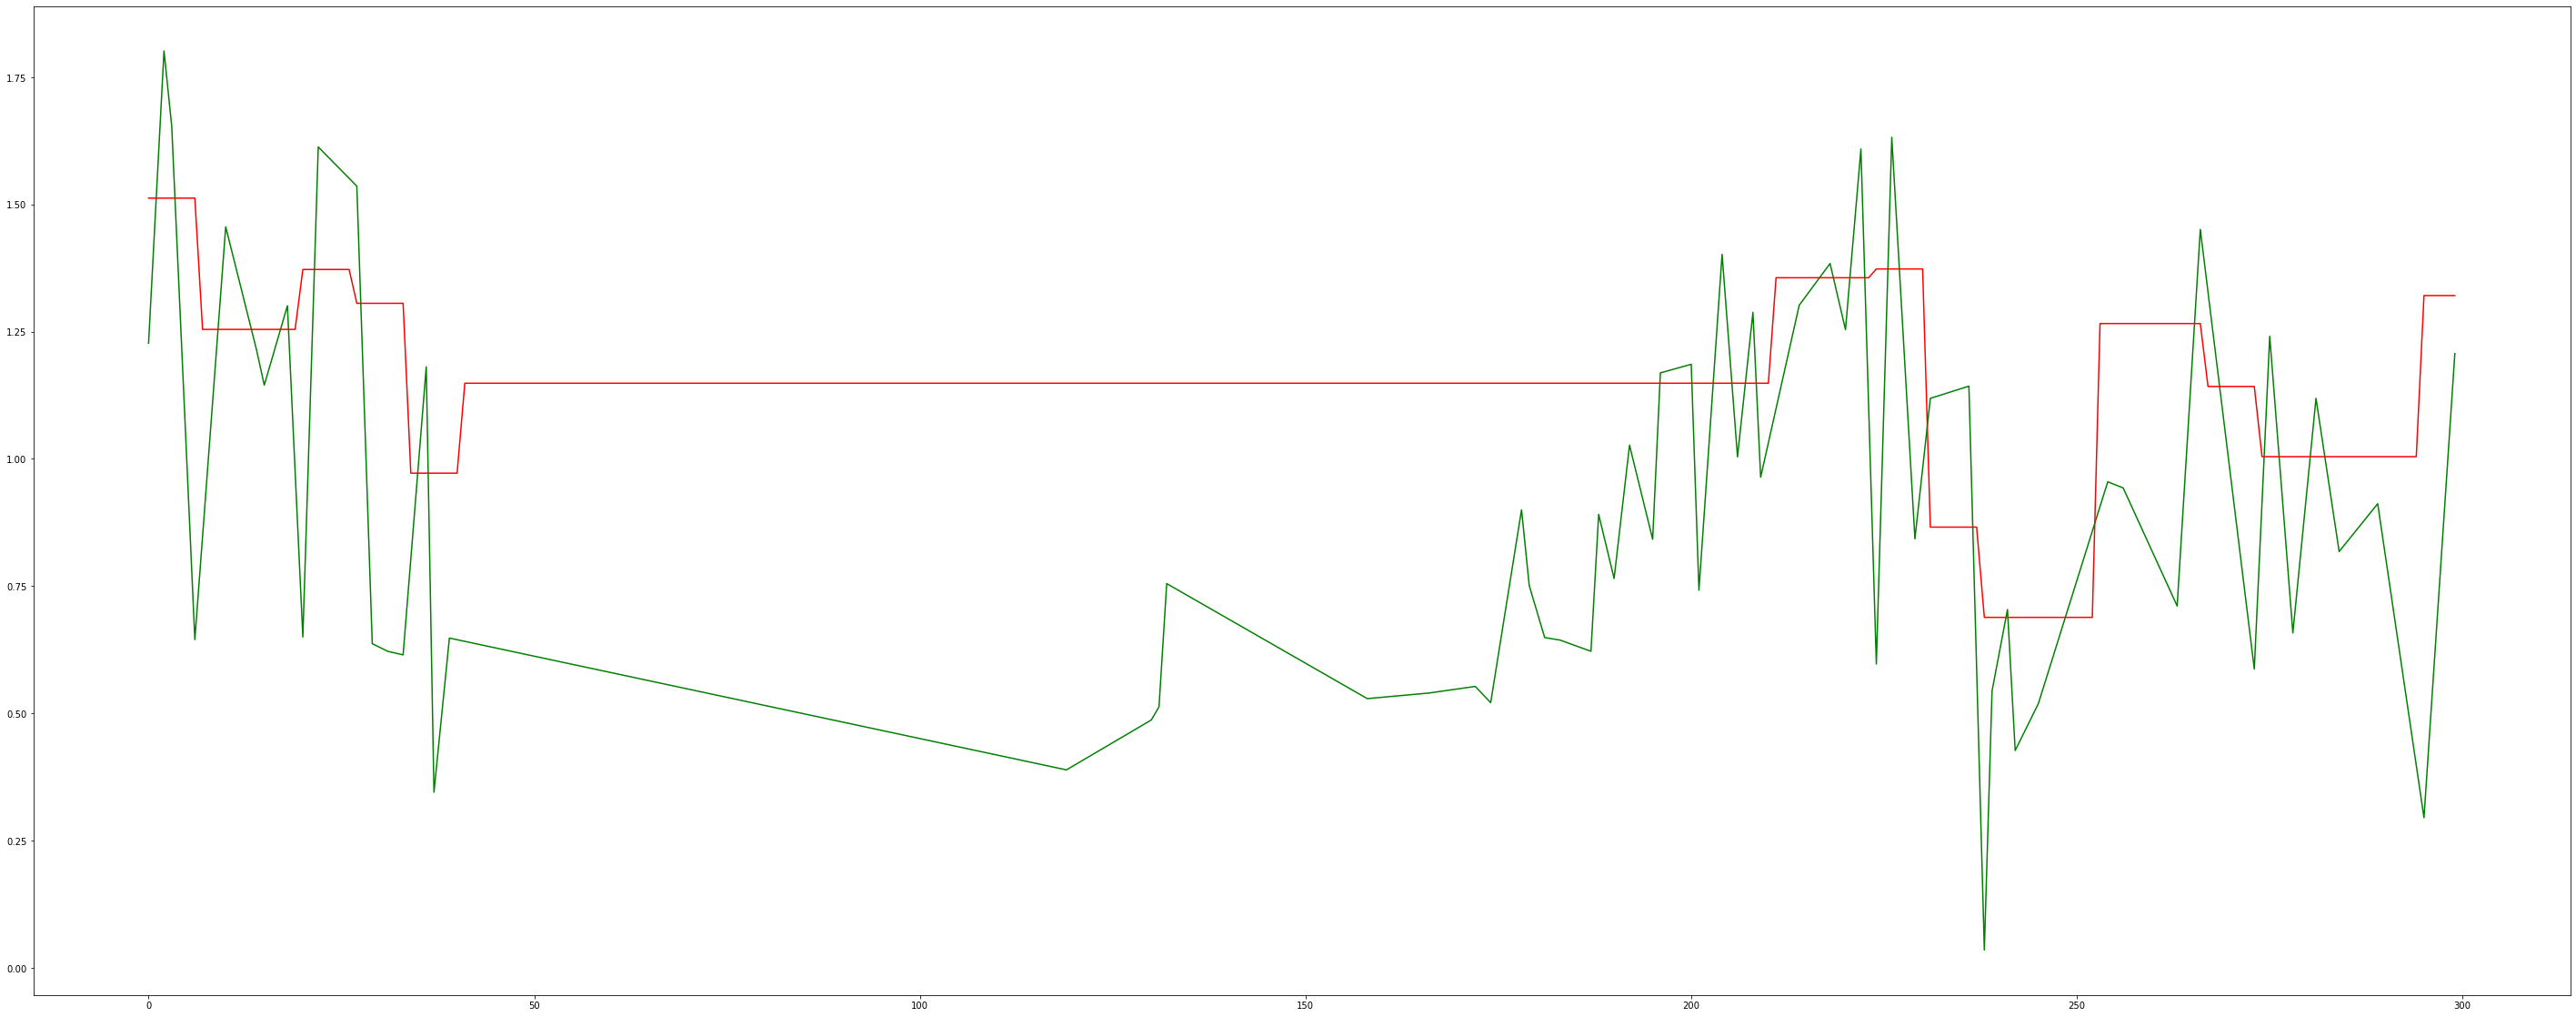

In [37]:
def plot_green_pink(green, pink, st, ed):
    plt.figure(figsize=(50,20))
    x = np.arange(len(pink[st:ed]))
    y = np.array(pink[st:ed])
    x_g = np.arange(len(green[st:ed]))
    y_g = np.array(green[st:ed])
    plt.plot(x_g, y_g, color='green')
    plt.plot(x, y, color='red')
    plt.show()

plot_green_pink(green, pink_line, 9700, 10000)

In [ ]:
print(pink_line)

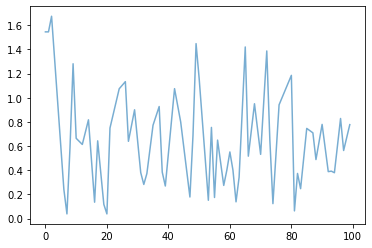

In [78]:
x = np.arange(len(green[:100]))
y = np.array(green[:100])
plt.plot(x, y, alpha=0.6)
plt.show()